# Hotel Data Analysis - Prediction of Cancellation

## Workshop on Data Science

### 0.1 install libraries

In [582]:
# !pip install pandas
# !pip install seaborn
# !pip install sklearn


You should consider upgrading via the 'c:\python\python38\python.exe -m pip install --upgrade pip' command.



  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)


### 0.2 Import Python Libraries

In [669]:
#data processing
import pandas as pd
import numpy as np


#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid")



In [670]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16


plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

### 0.3 Reading the Datase

In [671]:
hotel_data = pd.read_csv('data/hotel_bookings.csv')

# 1. Exploration (EDA) & Visualization


## Data Info :

### Size of the Dataset

In [672]:
hotel_data.shape

(119390, 32)

### Columns & Data types

In [673]:
hotel_data.head(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [674]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### There are 32 columns.
* 12 Categorical
* 20 Numerical

#### There are 4 columns with the missing values-
* country
* agent
* company
* children

##  Distribution :

### Data Statistics

In [675]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


* Most of the columns are full - according to the count line
* Avg. lead time is 104 days, around 3.5 months.
* Each booking has on an average 1.8 adults and 0.1 children.
* Only 3% of the guests are repeated.
* Median lead time is 69 days.

###  Class distribution

Text(0.5, 1.0, 'Canceled Distributions')

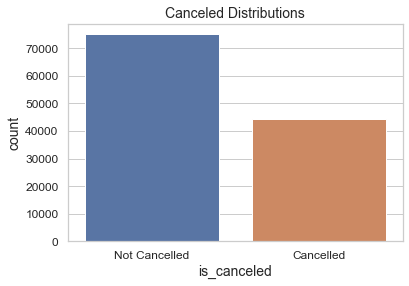

In [676]:
eda_data = hotel_data.copy()
eda_data['is_canceled'] = eda_data.is_canceled.replace([1,0],["Cancelled","Not Cancelled"])
eda_data['is_repeated_guest'] = hotel_data.is_repeated_guest.replace([1,0],["Repeated","Not Repeated"])


sns.countplot(x='is_canceled', data=eda_data)
plt.title('Canceled Distributions', fontsize=14)

In [677]:
hotel_data['is_canceled'].value_counts()/hotel_data.shape[0]*100

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64

#### Canceled Distribution :
* Not Canceled: 62.96%
* Canceled: 37.04%

## Introducing the various features :


In [678]:


numeric_variables_normal = ['lead_time','arrival_date_week_number','total_of_special_requests']

numeric_variables_normal2 = ['arrival_date_day_of_month', 'arrival_date_year','stays_in_weekend_nights',
                             'stays_in_week_nights','babies', 'booking_changes', 'company', 'adr']


numeric_variables_log1 = ['adults','children','previous_cancellations']
numeric_variables_log2 = ['previous_bookings_not_canceled','days_in_waiting_list','required_car_parking_spaces']

In [679]:

#      reservation_status_date
#  30  reservation_status              


### Categorical Variables :

In [680]:
categorical_variables = ['country', 'market_segment', 'agent','arrival_date_month', 'meal', 'reserved_room_type', 'assigned_room_type' ]
for i in categorical_variables:
    print(("{} : {} \n").format(i,hotel_data[i].nunique()))

country : 177 

market_segment : 8 

agent : 333 

arrival_date_month : 12 

meal : 5 

reserved_room_type : 10 

assigned_room_type : 12 



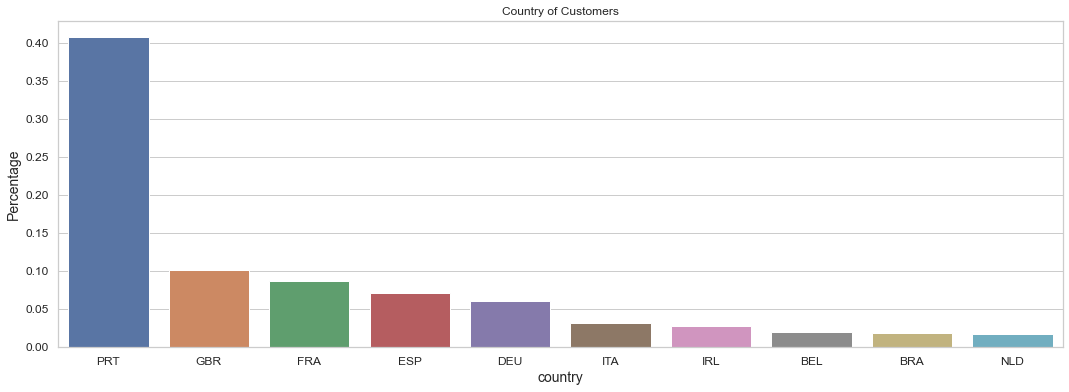

In [681]:
plt.figure(figsize=(18,6))
country_booking = hotel_data['country'].value_counts(normalize=True).rename_axis('country').reset_index(name='Percentage')
sns.barplot(x='country', y='Percentage', data=country_booking.head(10))
plt.title('Country of Customers')
plt.show()

* PRT or Portugal has the most booking demand based on the data (more than 60%). It is pretty obvious because if we trace to the publication page, the description tells us that the data source locations are from hotels located in Portugal.

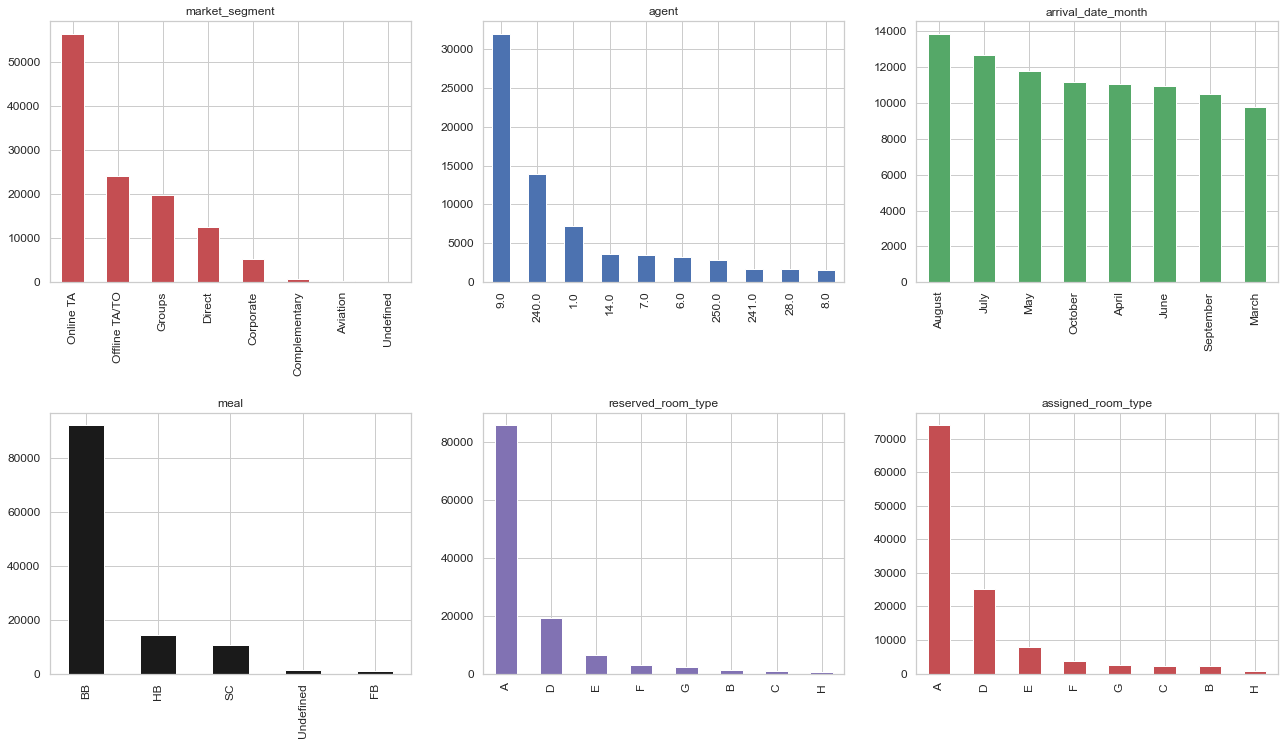

In [682]:
#generate a figures grid:
fig, axes = plt.subplots(2,3,figsize=(22,12))
fig.subplots_adjust(hspace=0.5)

#we will create a histogram for each categorical attribute
n=len(categorical_variables[1:])
num_rows = 3
max_bars = 8

for i,variable in enumerate(categorical_variables[1:]):
    #calculate the current place on the grid
    r=int(i/num_rows)
    c=i%num_rows
    
    #create the "value counts" for the first <max_bars> categories:
    u=min(hotel_data[variable].nunique(),max_bars)
    vc = hotel_data[variable].value_counts()[:u]
    
    # plot a bar chart using Pandas
    vc.plot(kind='bar',ax=axes[r,c],title=variable , color="rbgkm"[i%5])

* reserved_room_type and assigned_room_type similar, We will examine later the option to unify or download one of them
* Agent 9 is the most popular
* We will present the orders by months in a more orderly manner below
* The most common meal is BB (Bed & Breakfast)

#### Binary Variables :

In [683]:
binary_variables = ['hotel', 'is_repeated_guest','is_canceled', 'distribution_channel', 'deposit_type', 'customer_type']

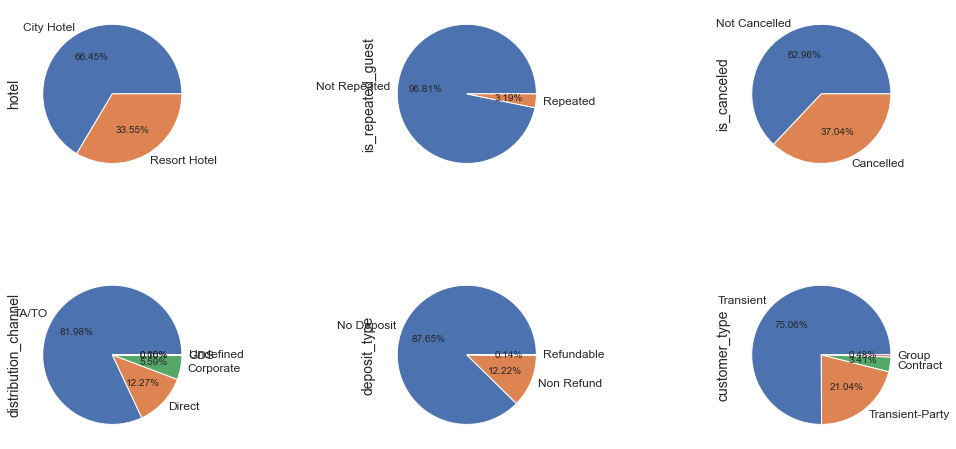

In [684]:
plt.rcParams.update({'font.size': 10})
#initialize a Matplotlib figures grid
fig, axes = plt.subplots(2,3,figsize=(18,8))
                         
fig.subplots_adjust(hspace=0.5)

#we will create a histogram for each categorical attribute
n=len(binary_variables)
num_rows = 3
                    
#generate a histogram using Pandas, for each numeric variable
for i, var in enumerate(binary_variables):
    r=int(i/num_rows)
    c=i%num_rows         
    eda_data[var].value_counts().plot.pie(ax=axes[r,c] ,autopct="%.2f%%")
    



* Most hotels are City hotel: 66% 
* The vast majority of customers are not repeat visitors
* In the most of the hotel no policy of diposit
* Most of thr custumer are transient (when the booking is not part of a group or contract)
* The most poplar Distribution Channel is “TA” means “Travel Agents” and “TO” means “Tour Operators”

### Numeric Variables :

In [685]:
numeric_variables_normal = ['lead_time','arrival_date_week_number','total_of_special_requests']

numeric_variables_normal2 = ['arrival_date_day_of_month', 'arrival_date_year','stays_in_weekend_nights',
                             'stays_in_week_nights','babies', 'booking_changes', 'company', 'adr']

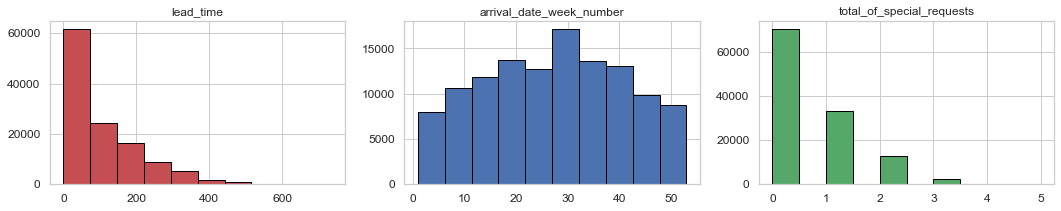

In [686]:
# Show numeric_variables
#initialize a Matplotlib figures grid
fig, axes = plt.subplots(1, len(numeric_variables_normal),figsize=(18,3))

#generate a histogram using Pandas, for each numeric variable
for ind,var in enumerate(numeric_variables_normal):
    hotel_data[var].hist(ax=axes[ind],edgecolor='black' ,color="rbgkm"[ind%5])
    axes[ind].set_title(var)


* Week 30 is the most popular week for August bookings (holiday)
* Earlier lead time is more common
* Most visitors do not make special requests

#### Distribution of lead time:

c:\python\python38\lib\site-packages\seaborn\distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

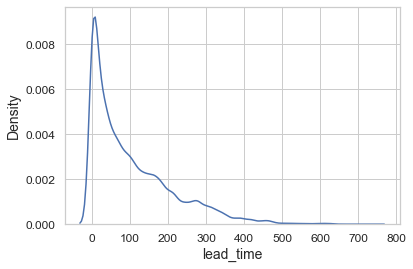

In [687]:
sns.kdeplot(hotel_data["lead_time"], kernel='epa')

* Avg. lead time is 104 days, around 3.5 months.
* Median lead time is 69 days.
* The decrease in lead time can be seen as time increases


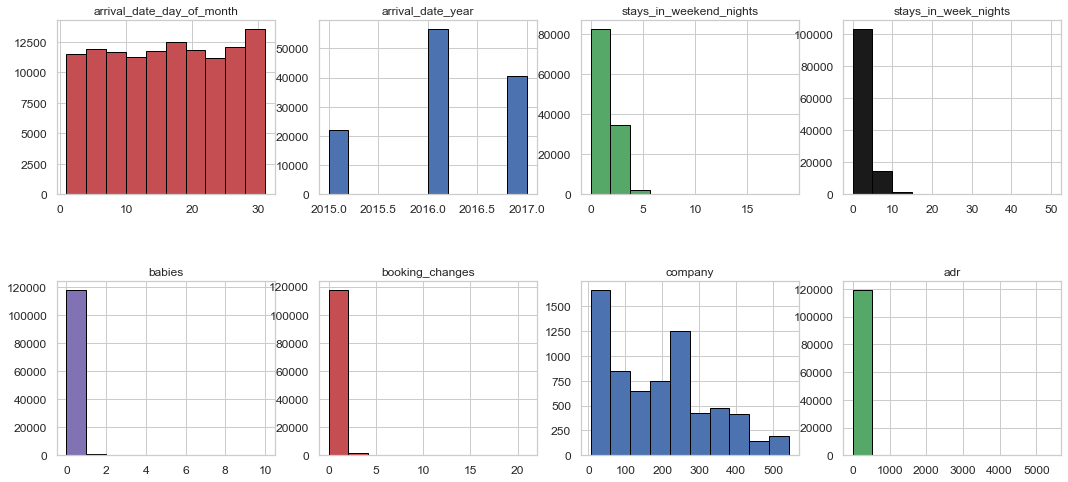

In [688]:
fig, axes = plt.subplots(2,4,figsize=(18,8))
fig.subplots_adjust(hspace=0.5)

#we will create a histogram for each categorical attribute
n=len(numeric_variables_normal2)
num_rows = 4

for i,var in enumerate(numeric_variables_normal2):
    #calculate the current place on the grid
    r=int(i/num_rows)
    c= i%num_rows
    
    
    hotel_data[var].hist(ax=axes[r,c] ,edgecolor='black' ,color="rbgkm"[i%5]).set_title(var)

    

* Arrival time is kind of uniform distributed, the most popular is arrival at the end of the month
* At 2016 was most of the arrival
* There are 236 different companies (id) where some of the data in them is null

#### Some of the plots are not informative so we will show them more plots:

c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'stays_in_week_nights')

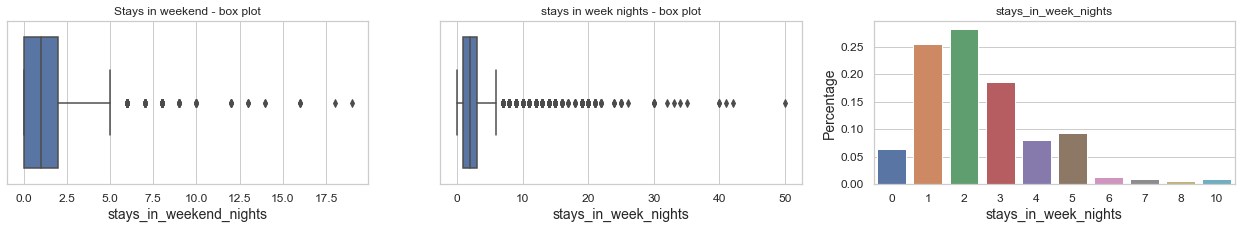

In [689]:
fig, axs = plt.subplots(1,3, figsize=(22,3))

sns.boxplot(hotel_data.stays_in_weekend_nights, ax=axs[0])
axs[0].set_title("Stays in weekend - box plot")

sns.boxplot(hotel_data.stays_in_week_nights, ax=axs[1])
axs[1].set_title("stays in week nights - box plot")


country_booking = hotel_data['stays_in_week_nights'].value_counts(normalize=True).rename_axis('stays_in_week_nights').reset_index(name='Percentage')
sns.barplot(ax=axs[2], x='stays_in_week_nights', y='Percentage', data=country_booking.head(10))
plt.title('stays_in_week_nights')


* There are extreme values - people who have booked for more than 5 weeks (over a month)
* The avarge pf stay in weekend is 1.19 day and weekday is 3.13
* More than 25 percent order 2 days a week

Text(0.5, 1.0, 'booking_changes')

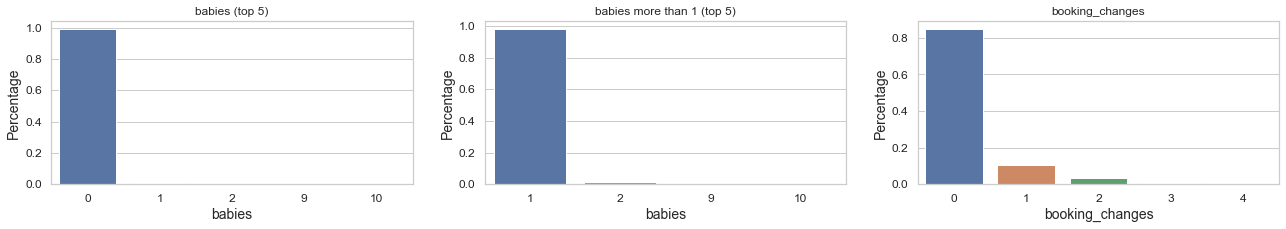

In [690]:
fig, axs = plt.subplots(1,3, figsize=(22,3))


country_booking = hotel_data['babies'].value_counts(normalize=True).rename_axis('babies').reset_index(name='Percentage')
sns.barplot(ax=axs[0], x='babies', y='Percentage', data=country_booking.head(5))
axs[0].set_title('babies (top 5)')

cg = hotel_data[hotel_data["babies"] > 0]
country_booking = cg['babies'].value_counts(normalize=True).rename_axis('babies').reset_index(name='Percentage')
sns.barplot(ax=axs[1], x='babies', y='Percentage', data=country_booking.head(5))
axs[1].set_title('babies more than 1 (top 5)')


country_booking = hotel_data['booking_changes'].value_counts(normalize=True).rename_axis('booking_changes').reset_index(name='Percentage')
sns.barplot(ax=axs[2], x='booking_changes', y='Percentage', data=country_booking.head(5))
plt.title('booking_changes')

* The vast majority of orders are with zero babys
* Those who did book with a baby usually booked for a single baby
* Most people do not change their order

c:\python\python38\lib\site-packages\seaborn\distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Adr - box plot')

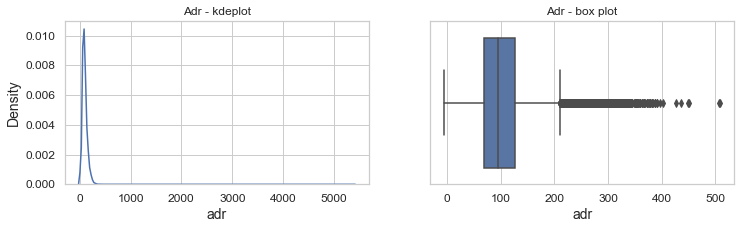

In [691]:
fig, axs = plt.subplots(1,2, figsize=(12,3))

sns.kdeplot(hotel_data["adr"], kernel='epa', ax=axs[0])
axs[0].set_title("Adr - kdeplot")

# days in waiting list not 0.. (boxplot)

cg = hotel_data[hotel_data["adr"] < 1000]
sns.boxplot(cg["adr"], ax=axs[1])
axs[1].set_title("Adr - box plot")

#### ADR - Average Daily Rate
    Calculated by dividing the sum of all lodging transactions by the total number of staying nights
* Can see an average in the 95 range and most of the data is between 90 and 115
* There is a some data that is considered extreme (over 210)

In [692]:
numeric_variables_log1 = ['adults','children','previous_cancellations']
numeric_variables_log2 = ['previous_bookings_not_canceled','days_in_waiting_list','required_car_parking_spaces']
# Const
bins = []
for x in range(-1,5400,1):
    bins.append(x+0.5)

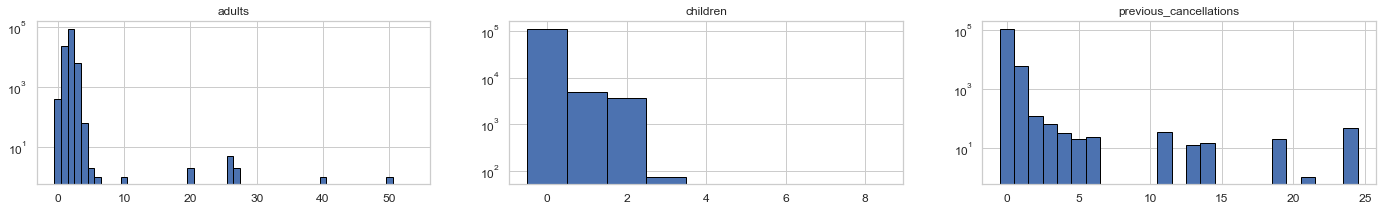

In [693]:
# Show numeric_variables: 
#initialize a Matplotlib figures grid
fig, axes = plt.subplots(1, len(numeric_variables_log1),figsize=(24,3))


#generate a histogram using Pandas, for each numeric variable
for ind,var in enumerate(numeric_variables_log1):
    max_value = int(hotel_data[var].max())
    slice_object = slice(max_value)
    hotel_data[var].hist(ax=axes[ind],bins=bins[slice_object], edgecolor='black', log=True)
    axes[ind].set_title(var)

* Most bookings are for 1 adult or more (2 is must commen)
* Most customers do not have children (or at least did not include them in the order)
* Most people have not previously canceled an order before the current orde

#### Can see that there are slight noises in the data : 
* There are data showing over 20 guests and even 50
* Or order with 10 babies (unlikely)

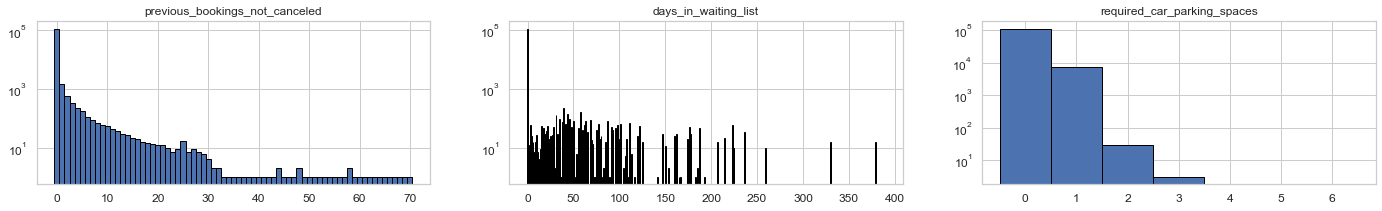

In [694]:
# Show numeric_variables:
#initialize a Matplotlib figures grid
fig, axes = plt.subplots(1, len(numeric_variables_log2),figsize=(24,3))

#generate a histogram using Pandas, for each numeric variable
for ind,var in enumerate(numeric_variables_log2):
    max_value = int(hotel_data[var].max())
    slice_object = slice(max_value)
    hotel_data[var].hist(ax=axes[ind],bins=bins[slice_object], edgecolor='black', log=True)
    axes[ind].set_title(var)

* It can be seen that according to previous orders most customers do not cancel orders
* Most people do not require parking, and those who do, ask for one

c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_in_waiting_list'>

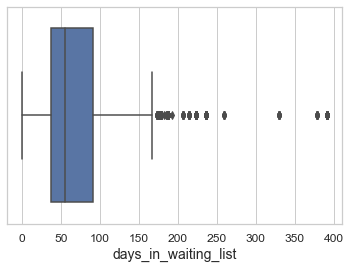

In [695]:
# days in waiting list not 0.. (boxplot)
fig, axs = plt.subplots(1,1, figsize=(6,4))

cg = hotel_data[hotel_data["days_in_waiting_list"] > 0]
sns.boxplot(cg["days_in_waiting_list"])

* The average time to be on the waiting list is 0.5
* The vast majority of straight orderers are happy and not waiting on the waiting list
  <br>But those who waited usually waited about 50 days
* Most of the waiters are in the range of 40 to 90
* There are extreme values that have waited over 170 days (half a year or more)

## Comparative Visualizations To Cancellation :

### Market segment vs Cancellations

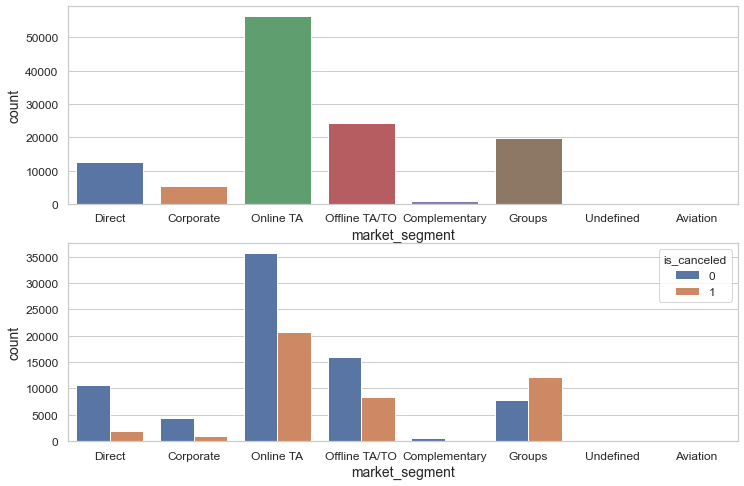

In [696]:
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (12,8))
sns.countplot(x = 'market_segment', data = hotel_data, ax = ax[0])
sns.countplot(x = 'market_segment', data = hotel_data, hue = 'is_canceled', ax = ax[1])
plt.show()

* It can be seen that the order of the amount of orders in market segment does change in cancellations filter:
<br> **from -** 
<br> &emsp; Online TA -> Offline TA -> Groups -> Direct -> Corporate
<br> **To -**
<br> &emsp; Online TA -> **Groups** -> **Offline TA** -> Direct -> Corporate

#### It is possible that order in a group increased the chances of cancellations


### Date vs Cancellations

#### Arrival date month

Text(0, 0.5, 'Count')

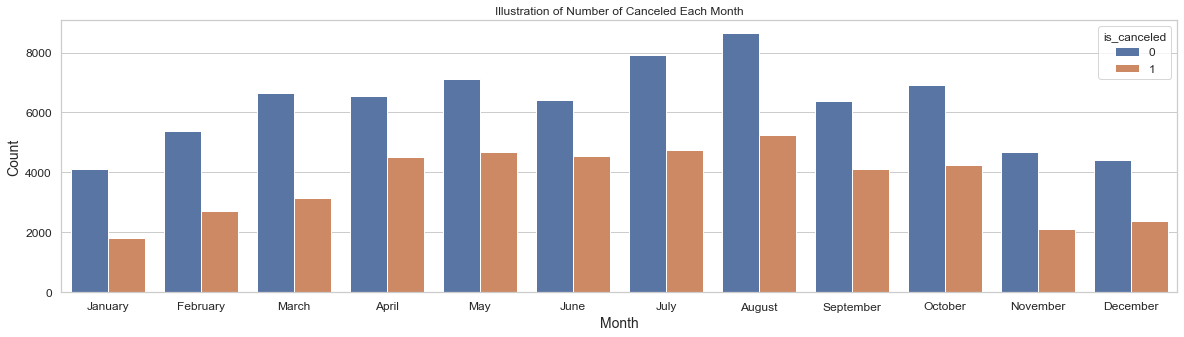

In [697]:
# Number of Canceled Each Month

# We can simply use a countplot as we sre visualising categorical data
plt.figure(figsize=(20,5))

# data we will use in a list
l1 = ['is_canceled','arrival_date_month']

# plotting
sns.countplot(data = hotel_data[l1],x= "arrival_date_month",hue="is_canceled",order=["January","February","March","April","May","June",
                                                                              "July","August","September","October","November","December"]).set_title(
'Illustration of Number of Canceled Each Month')
plt.xlabel('Month')
plt.ylabel('Count')

#### Arrival year

In [698]:
hotel_data.groupby(['arrival_date_year'])['is_canceled'].mean()

arrival_date_year
2015    0.370158
2016    0.358633
2017    0.386979
Name: is_canceled, dtype: float64

#### Arrival week number

Text(0.5, 1.0, 'Illustration of Canceled Each week')

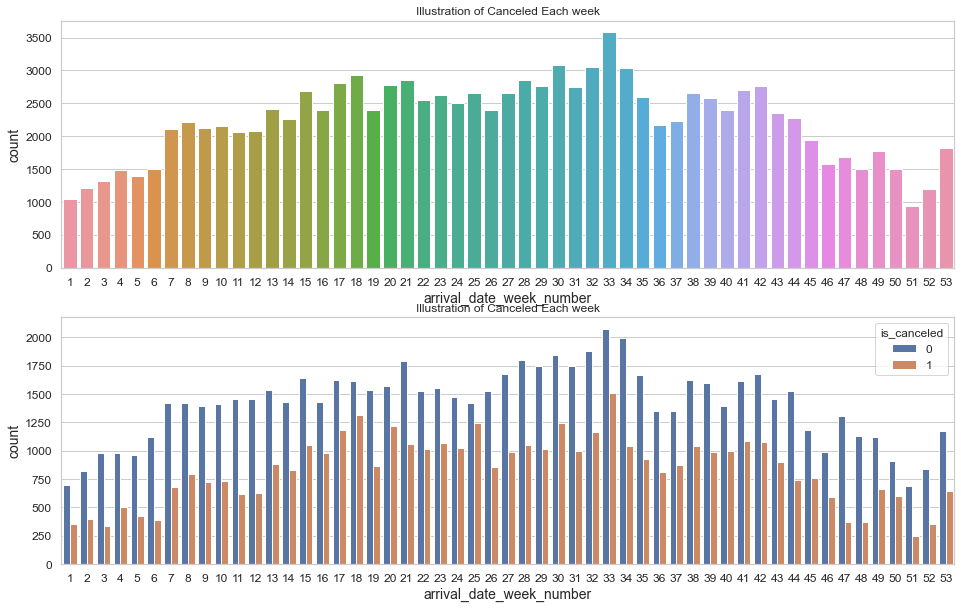

In [699]:
fig, axs = plt.subplots(2,1, figsize=(16,10))


# We can simply use a countplot as we sre visualising categorical data
# plt.figure(figsize=(20,5))

# data we will use in a list
l1 = ['is_canceled','arrival_date_week_number']

# plotting
sns.countplot(ax = axs[0], data = hotel_data[l1],x= "arrival_date_week_number").set_title(
'Illustration of Canceled Each week')

# plotting
sns.countplot(ax = axs[1], data = hotel_data[l1],x= "arrival_date_week_number",hue="is_canceled").set_title(
'Illustration of Canceled Each week')


* Can see similarities between the graphs
*There are weeks when the cancellation ratio changes slightly but not something extreme

#### Summary  date vs cancellations:
* The cancellation rate is quite consistently high during april to october having its peak at august.
* There is no direct effect between the month and the amount of cancellations
* This year does not affect the cancellation at all around 36%
*There are weeks when the cancellation ratio changes slightly but not something extreme



### Deposit  type vs Cancellations

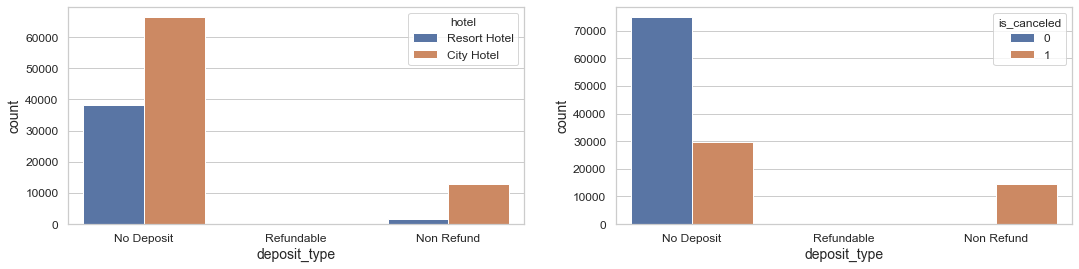

In [700]:
_, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (18,4))
sns.countplot(x = 'deposit_type', data = hotel_data, hue = 'hotel', ax = ax[0])
sns.countplot(x = 'deposit_type', data = hotel_data, hue = 'is_canceled', ax = ax[1])
plt.show()

* Deposit type has 3 categories - No Deposit, refundable, Non Refund
* Either customers have opted for no deposit or non refundable deposits.
* Maybe refundable deposit type is not offered by the hotels.
* All of the non refund bookings have been cancelled in our dataset. That might prove important feature based on how many such   bookings are part of cancelled bookings.
* No hotel has refundable deposit type

* In city hotel is more common Non Refund deposit policy 

### Hotel type vs Cancellations

Text(0.5, 1.0, 'Graph showing cancellation rates in city and resort hotel')

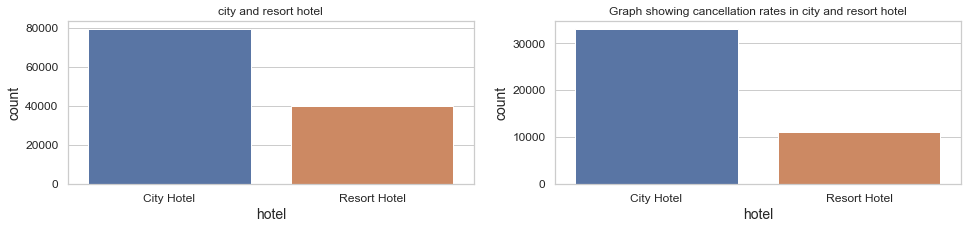

In [701]:
# Let's look into how much of bookings were cancelled in each type of hotel
fig, axs = plt.subplots(1,2, figsize=(16,3))

sns.countplot(x = 'hotel', data = hotel_data, ax = axs[0], order = hotel_data['hotel'].value_counts().index).set_title('city and resort hotel')

lst1 = ['is_canceled', 'hotel']
type_of_hotel_canceled = eda_data[lst1]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'Cancelled'].groupby(['hotel']).size().reset_index(name = 'count')
canceled_hotel
sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count', ax=axs[1]).set_title('Graph showing cancellation rates in city and resort hotel')

In [702]:
hotel_data.groupby(['hotel'])['is_canceled'].mean()

hotel
City Hotel      0.417270
Resort Hotel    0.277634
Name: is_canceled, dtype: float64

* City hotel has high Cancellation rate than Resort Hotel.
* Around 27% for resort hotel and greater than 40 % for city hotel.

#### There seems to be a connection between the type of hotel and the chance of cancellation

### Customer profile vs Cancellations

Text(0.5, 1.0, 'Illustration of number of babies canceling booking')

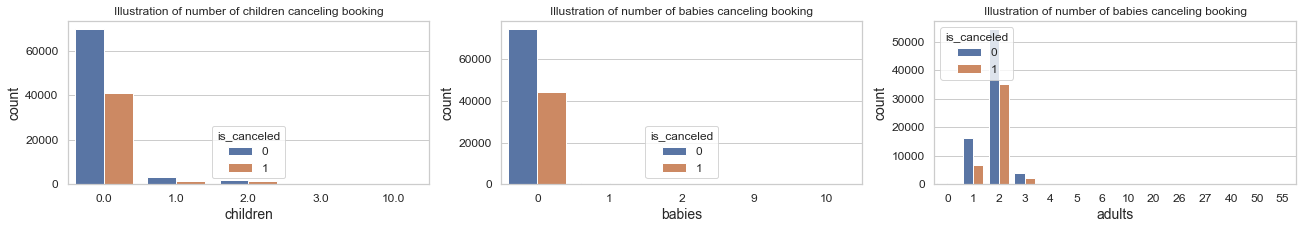

In [703]:
fig, axs = plt.subplots(1,3, figsize=(22,3))


# We will just look at number of children that canceled booking.
sns.countplot(ax=axs[0], data=hotel_data,x='children',hue='is_canceled').set_title("Illustration of number of children canceling booking")

# We will just look at number of babies that canceled booking.
sns.countplot(ax=axs[1],data=hotel_data,x='babies',hue='is_canceled').set_title("Illustration of number of babies canceling booking")


sns.countplot(ax=axs[2],data=hotel_data,x='adults',hue='is_canceled').set_title("Illustration of number of babies canceling booking")


* There does not appear to be a direct link between the customer profile and the cancellations.
* We will later choose to try and convert these features to a single feature (After cleaning and arranging)

### Customer type vs Cancellations

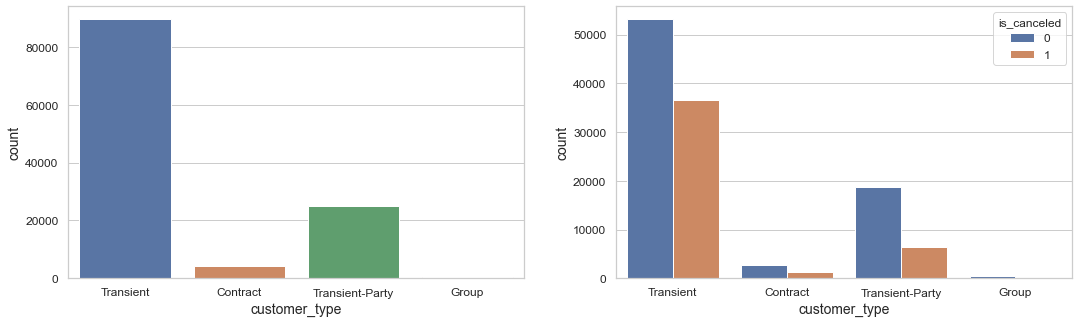

In [704]:
_, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (18,5))
sns.countplot(x = 'customer_type', data = hotel_data, ax = ax[0])
sns.countplot(x = 'customer_type', data = hotel_data, hue = 'is_canceled', ax = ax[1])
plt.show()

* Same order for customer of bookings and cancellation rate

### Reservation status vs Cancellations

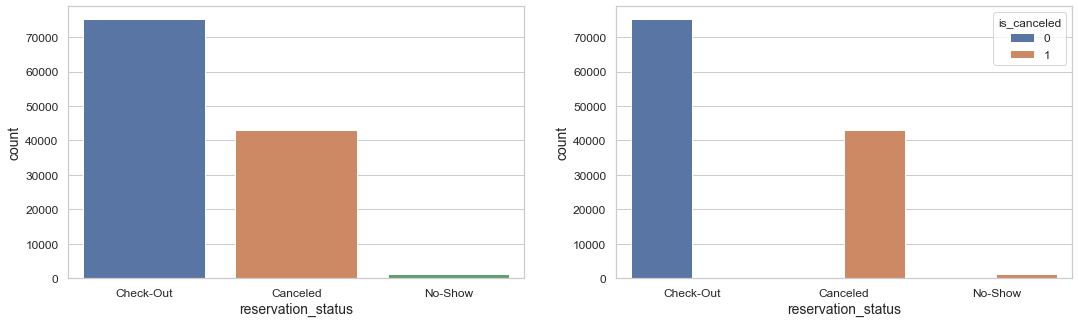

In [705]:
_, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (18,5))
sns.countplot(x = 'reservation_status', data = hotel_data, ax = ax[0])
sns.countplot(x = 'reservation_status', data = hotel_data, hue = 'is_canceled', ax = ax[1])
plt.show()

* A strong connection can be seen between the two features
* **Because this is the feature we predict we will delete it at the cleaning stage**

## Clean The Data ( part 1 ) :

### Replace missing value

In [729]:
clean_data = hotel_data.copy()

clean_data.fillna({"children": 0}, inplace=True)

# missing countries can be labeled unknown
clean_data.fillna({"country": "Unknown"}, inplace=True)

# missing agent ID can be zero, presuming the booking was made privately
clean_data.fillna({"agent": 0}, inplace=True)

# missing company ID can be zero (for the same reason as agent ID)
clean_data.fillna({"company": 0}, inplace=True)

* can assume that null is represents no children
* missing countries can be labeled unknown
* missing agent ID can be zero, presuming the booking was made privately
* missing company ID can be zero (for the same reason as agent ID)


In [732]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [733]:
clean_data.isnull().sum()/clean_data.shape[0]*100

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
company                           0.0
days_in_waiting_list              0.0
customer_typ

delet  Reservation status...

## Correlation Heat Map of features

<AxesSubplot:>

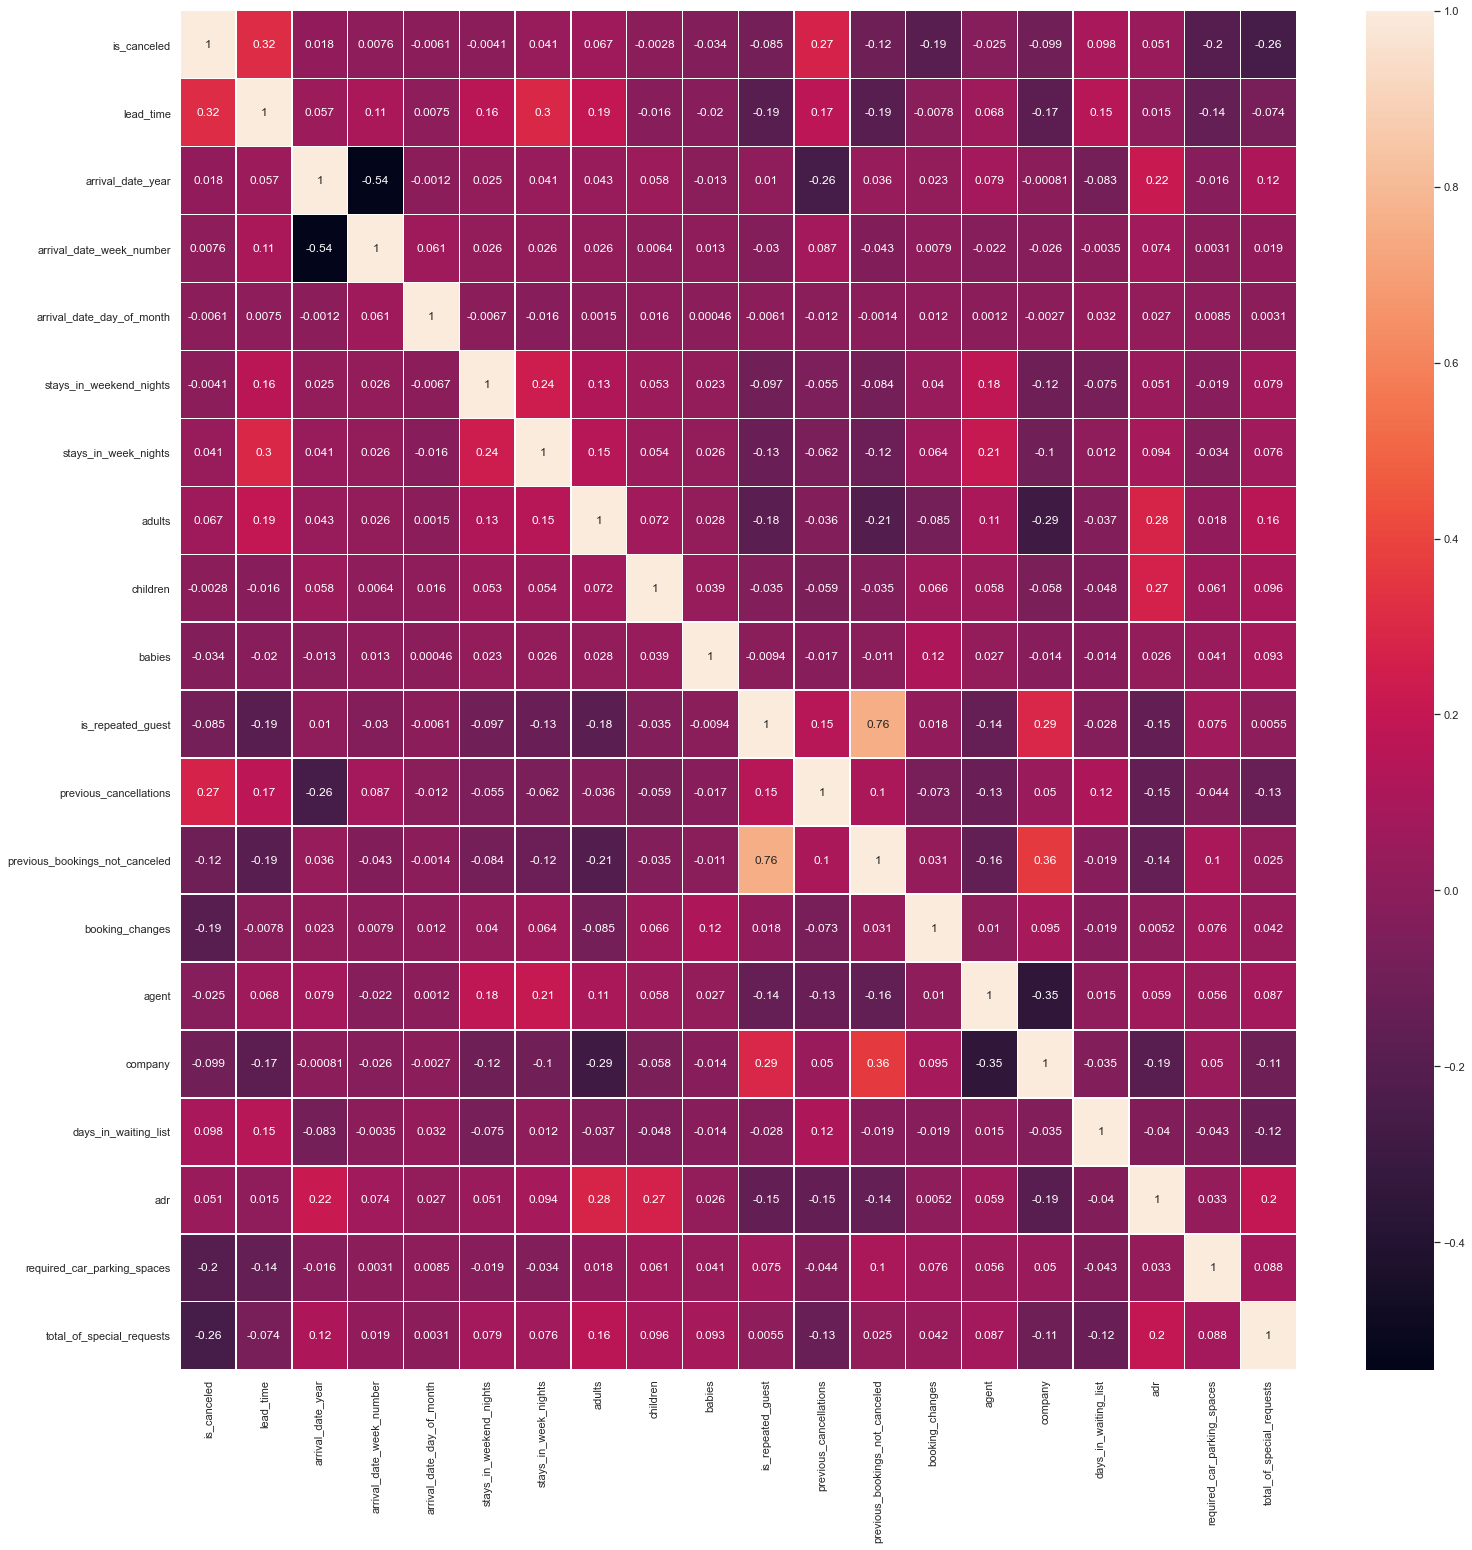

In [734]:
corr_matrix = clean_data.corr(method='spearman')
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(clean_data.corr(method='spearman'),annot=True,linewidths=.5)


In [710]:
corr_matrix = clean_data.corr()
corr_matrix["is_canceled"].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005036
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
babies                           -0.032491
agent                            -0.046529
previous_bookings_not_canceled   -0.057358
company                          -0.082995
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

#### At this stage, we will examine only the numerical features (later we will convert additional features)

#### The must strong connections are between cancelesion and this features:
* lead_time 
* total_of_special_requests
* required_car_parking_spaces
* previous_cancellations

## Depth analysis of the strong bond :

### Lead time

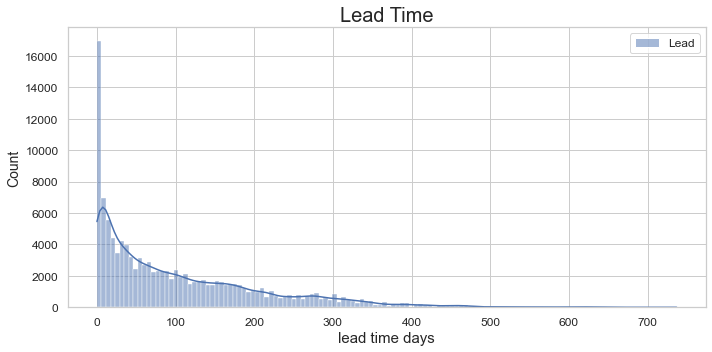

In [711]:
# hist plot of lead time
# kde = kernel density estimation (displays distribution function, density curve)
# shows the distribution and highest concentration points
plt.figure(figsize=(10,5))
lead_time = clean_data['lead_time']
lead_time = pd.DataFrame(sorted(lead_time, reverse = True), columns = ['Lead'])
sns.histplot(lead_time, kde=True)
plt.title("Lead Time", size=20)
plt.xlabel("lead time days", size=15)
plt.tight_layout()
plt.show()

In [712]:
lead_time_1 = clean_data[clean_data["lead_time"] < 50]
lead_time_2 = clean_data[clean_data["lead_time"] < 100]
lead_time_3 = clean_data[clean_data["lead_time"] < 150]
lead_time_4 = clean_data[clean_data["lead_time"] < 200]
lead_time_5 = clean_data[(clean_data["lead_time"] >= 200) & (clean_data["lead_time"] < 365)]
lead_time_6 = clean_data[clean_data["lead_time"] >= 365]
# calculates cancellations according to lead time groups
lead_cancel_1 = lead_time_1["is_canceled"].value_counts()
lead_cancel_2 = lead_time_2["is_canceled"].value_counts()
lead_cancel_3 = lead_time_3["is_canceled"].value_counts()
lead_cancel_4 = lead_time_4["is_canceled"].value_counts()
lead_cancel_5 = lead_time_5["is_canceled"].value_counts()
lead_cancel_6 = lead_time_6["is_canceled"].value_counts()

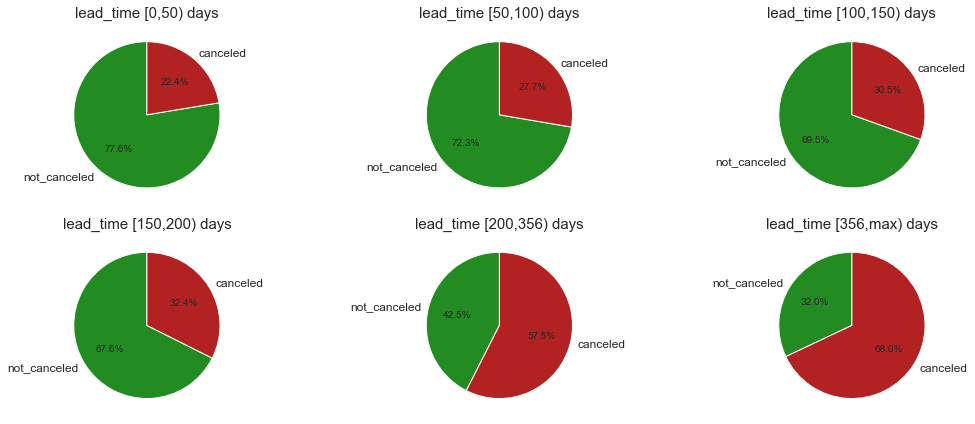

In [713]:
# total count of lead time according to cancellation
total_lead_days_cancel = pd.DataFrame(data=[lead_cancel_1,lead_cancel_2,lead_cancel_3,lead_cancel_4,lead_cancel_5,lead_cancel_6],
                                      index=["[0,50) days","[50,100) days","[100,150) days","[150,200) days","200,365) days","[365,max) days"])

# pie plot for each lead time group
fig, ax = plt.subplots(2,3, figsize=(15,6))
ax[0,0].pie(np.array([total_lead_days_cancel[0][0], total_lead_days_cancel[1][0]]),
          labels=["not_canceled", "canceled"], autopct='%1.1f%%', startangle=90,
          colors=['forestgreen', 'firebrick'])
ax[0,0].set_title("lead_time [0,50) days", size=15)
ax[0,1].pie(np.array([total_lead_days_cancel[0][1], total_lead_days_cancel[1][1]]),
          labels=["not_canceled", "canceled"], autopct='%1.1f%%', startangle=90,
          colors=['forestgreen', 'firebrick'])
ax[0,1].set_title("lead_time [50,100) days", size=15)
ax[0,2].pie(np.array([total_lead_days_cancel[0][2], total_lead_days_cancel[1][2]]),
          labels=["not_canceled", "canceled"], autopct='%1.1f%%', startangle=90,
          colors=['forestgreen', 'firebrick'])
ax[0,2].set_title("lead_time [100,150) days", size=15)


ax[1,0].pie(np.array([total_lead_days_cancel[0][3], total_lead_days_cancel[1][3]]),
          labels=["not_canceled", "canceled"], autopct='%1.1f%%', startangle=90,
          colors=['forestgreen', 'firebrick'])
ax[1,0].set_title("lead_time [150,200) days", size=15)

ax[1,1].pie(np.array([total_lead_days_cancel[0][4], total_lead_days_cancel[1][4]]),
          labels=["not_canceled", "canceled"], autopct='%1.1f%%', startangle=90,
          colors=['forestgreen', 'firebrick'])
ax[1,1].set_title("lead_time [200,356) days", size=15)

ax[1,2].pie(np.array([total_lead_days_cancel[0][5], total_lead_days_cancel[1][5]]),
          labels=["not_canceled", "canceled"], autopct='%1.1f%%', startangle=90,
          colors=['forestgreen', 'firebrick'])
ax[1,2].set_title("lead_time [356,max) days", size=15)

plt.tight_layout()
plt.show()

#### It can be clearly seen, as the lead time increases the chance of cancellation increases :
* And that does make sense, since there is more time to cancel, and the chances of change are greater

### Special Requests

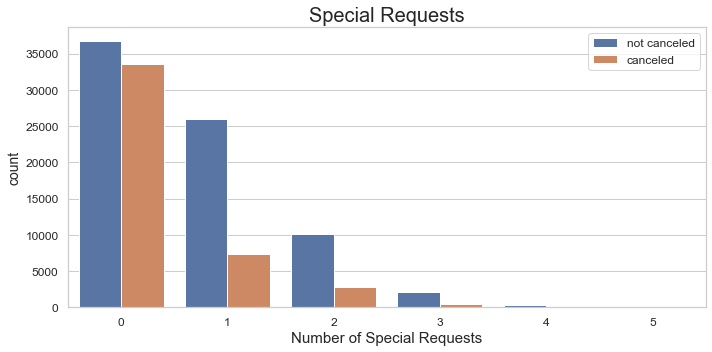

In [714]:
# plot special requests according to cancellations
plt.figure(figsize=(10,5))
sns.countplot(x=clean_data["total_of_special_requests"], hue=clean_data["is_canceled"])
plt.title("Special Requests", size=20)
plt.xlabel("Number of Special Requests", size=15)
plt.legend(["not canceled", "canceled"])
plt.tight_layout()
plt.show()

# Nearly half of the bookings without special requests are canceled.

#### There is a strong connection between the number of requests and the cancellations
* The more requests there are the chance of cancellation decreases significantly
* One request is enough to greatly reduce the chance of cancellation

## A combination of the two features

In [715]:
var_a = 'lead_time'
var_b = 'total_of_special_requests'


canceled = clean_data[clean_data['is_canceled'] == 1]
not_canceled = clean_data[clean_data['is_canceled'] == 0]

c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Scatter plot of lead_time and total_of_special_requests')

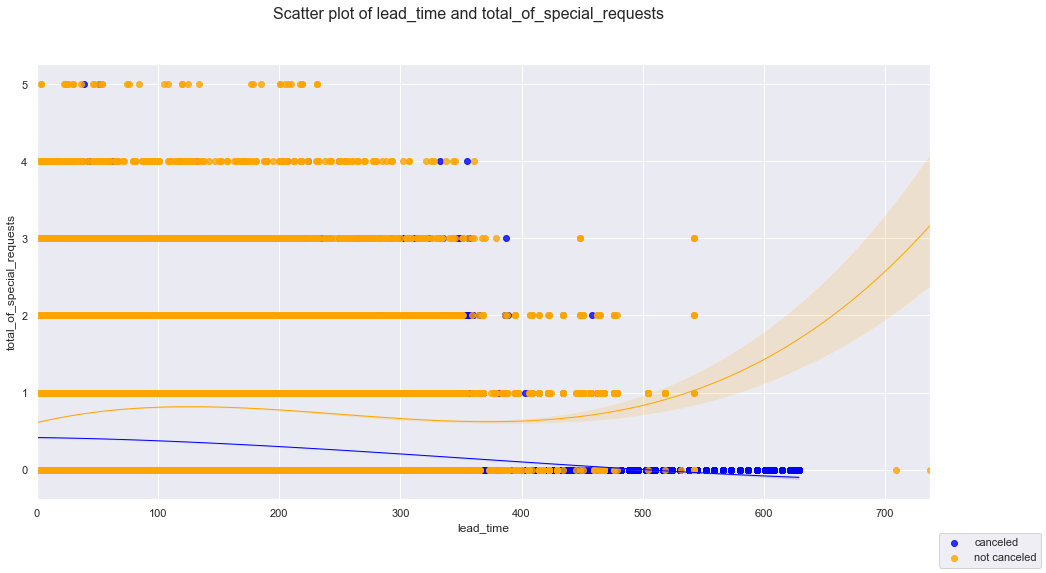

In [716]:
sns.set(color_codes=True)
fig,ax=plt.subplots(figsize=(16,8))

sns.regplot(var_a, var_b, canceled,ax=ax, 
            scatter_kws={"marker": ".", "color": "blue"},
            line_kws = {"linewidth": "1", "color": "blue"},
            order = 3,
            label = 'canceled')
sns.regplot(var_a, var_b, not_canceled,ax=ax, 
            scatter_kws={"marker": ".", "color": "orange"},
            line_kws = {"linewidth": "1", "color": "orange"},
            order = 3,
            label = 'not canceled')

fig.legend(loc="lower right")
fig.suptitle(f"Scatter plot of {var_a} and {var_b}")

### The following plot shows the two points presented earlier
* Relationship between the number of requests and cancellations
* Relationship between order time and cancellations

### In the plot it can be seen that looking at the two features together allows for understanding (partial prediction) at a higher probability.
* The sheer majority of the blue dots in the lower right quarter of the graph

## Clean The Data ( part 2 ) :

hotel -> bool,

arrival_date_month ->  int  ? hot

meal_dict -> int ? hot // TODO

country -> int  ? hot // TODO

market_segment to int  ? hot // TODO

distribution_channel to int ? hot // TODO

reserved_room_type to int ? hot // TODO (or orde)

assigned_room_type_dict TO INT ? hot // TODO (or orde)

deposit_typ TO INT ? hot // TODO

customer_type TO INT ? hot // TODO

reservation_status // Delete 

reservation_status_date // Delete

In [738]:
def setDictionary(dictionary,unique_data_arr): 
    for i in range (len(unique_data_arr)):
        dictionary[unique_data_arr[i]] = i
    return dictionary

In [739]:
# hotel to bool
clean_data['hotel']= clean_data['hotel'].replace(["Resort Hotel","City Hotel"],[1,0])

# arrival_date_month to int 
month_dict = {'January': 0, 'February': 1, 'March': 2, 'April': 3, 'May': 4, 'June': 5, 'July': 6, 'August': 7, 'September': 8, 'October': 9, 'November': 10, 'December': 11} 
clean_data['arrival_date_month']= clean_data['arrival_date_month'].map(month_dict)

# meal to int 
meal_dict = {'BB':1, 'FB':2 ,'HB':3, 'SC':4 ,'Undefined':0}
clean_data['meal'] = clean_data['meal'].map(meal_dict)


# countery to int 
country_dict ={}
country_arr = clean_data['country'].unique()
country_dict = setDictionary(country_dict, clean_data['country'].unique())
clean_data['country'] = clean_data['country'].map(country_dict)

# market_segment to int 
market_segment_dict ={}
market_segment_dict = setDictionary(market_segment_dict,clean_data['market_segment'].unique())
clean_data['market_segment'] = clean_data['market_segment'].map(market_segment_dict) 

# distribution_channel to int
distribution_channel_dict = {}
distribution_channel_dict = setDictionary(distribution_channel_dict,clean_data['distribution_channel'].unique())
clean_data['distribution_channel'] = clean_data['distribution_channel'].map(distribution_channel_dict) 

# reserved_room_type to int
reserved_room_type_dict = {}
reserved_room_type_dict = setDictionary(reserved_room_type_dict,clean_data['reserved_room_type'].unique())
clean_data['reserved_room_type'] = clean_data['reserved_room_type'].map(reserved_room_type_dict)

# assigned_room_type_dict TO INT 
assigned_room_type_dict = {}
assigned_room_type_dict = setDictionary(assigned_room_type_dict, clean_data['assigned_room_type'].unique())
clean_data['assigned_room_type'] = clean_data['assigned_room_type'].map(assigned_room_type_dict)

# deposit_typ TO INT 
deposit_type_dict = {}
deposit_type_dict = setDictionary(deposit_type_dict,clean_data['deposit_type'].unique())
clean_data['deposit_type'] = clean_data['deposit_type'].map(deposit_type_dict)

# customer_type TO INT 
customer_type_dict = {}
customer_type_dict = setDictionary(customer_type_dict, clean_data['customer_type'].unique())
clean_data['customer_type'] = clean_data['customer_type'].map(customer_type_dict)

# reservation_status TO INT 
reservation_status_dict = {}
reservation_status_dict = setDictionary(reservation_status_dict,clean_data['reservation_status'].unique())
clean_data['reservation_status'] = clean_data['reservation_status'].map(reservation_status_dict)

# reservation_status_date TO INT 
reservation_status_date_dict ={}
reservation_status_date_dict =setDictionary(reservation_status_date_dict, clean_data['reservation_status_date'].unique())
clean_data['reservation_status_date'] = clean_data['reservation_status_date'].map(reservation_status_date_dict)

clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### All features are scissors and you can start working with them

# Model :

## Imports : 

In [747]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

## Data distribution (train, test)

In [757]:
y = clean_data['is_canceled']
X = clean_data.drop('is_canceled',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.info(), X_test.info(), y_train, y_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83573 entries, 9710 to 15795
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83573 non-null  int64  
 1   lead_time                       83573 non-null  int64  
 2   arrival_date_year               83573 non-null  int64  
 3   arrival_date_month              83573 non-null  int64  
 4   arrival_date_week_number        83573 non-null  int64  
 5   arrival_date_day_of_month       83573 non-null  int64  
 6   stays_in_weekend_nights         83573 non-null  int64  
 7   stays_in_week_nights            83573 non-null  int64  
 8   adults                          83573 non-null  int64  
 9   children                        83573 non-null  float64
 10  babies                          83573 non-null  int64  
 11  meal                            83573 non-null  int64  
 12  country                      

In [758]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.predict(X_test)

print(accuracy_score(y_test,y_pred))

# alg.fit(X_train, y_train)
#     global y_pred
#     y_pred = alg_model.predict(X_test)
    
#     print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
#       .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))

# def model1(X_train,X_test,y_train,y_test):
#     y_pred = alg_model.predict(X_test)
    
# model1(X_train,X_test,y_train,y_test)

c:\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'y_pred' is not defined